In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("E:/práce/firmy/cafe slavia/analysis/Coffee_house_data/data_clean/rastrCombined.csv")

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.head()

,Name,Value,Date
0,Moučníky,158.0,2023-01-18
1,Moučníky,79.0,2023-08-02
2,Alkohol,396.0,2023-08-02
3,Nealko,147.0,2023-09-02
4,Nezaplaceno,78.0,2023-11-02


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Name    2069 non-null   object        
 1   Value   2069 non-null   float64       
 2   Date    2069 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 48.6+ KB


In [10]:
df.describe()

,Value
count,2069.000000
mean,1423.103316
std,1949.088416
min,3.300000
25%,208.000000
50%,588.000000
75%,1829.000000
max,14906.000000


In [10]:
# grouped by category
grouped = (df.groupby("Name", as_index=False)["Value"].sum().sort_values("Value", ascending=False))

In [48]:
grouped

,Name,Value
3,Káva,1102054.10
1,Dorty,713293.10
5,Nealko,423965.80
2,Koktejly,296393.60
12,Zmrzlina,171944.00
0,Alkohol,68140.15
6,Nealko koktejly a vina,65382.46
9,Slané,32589.95
11,Teplé nealko,31935.30
7,Nezaplaceno,23749.00


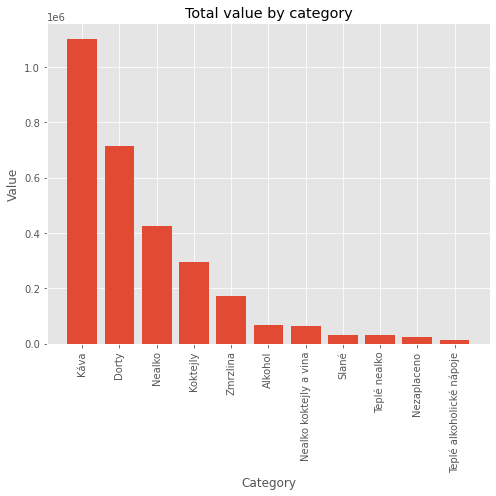

In [22]:
filtered = grouped[grouped['Value'] > 1000]
fig,ax = plt.subplots(figsize=(7,7))
plt.bar(filtered["Name"], filtered['Value'])
plt.xticks(rotation=90)
plt.title("Total value by category")
plt.xlabel("Category")
plt.ylabel("Value")
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

In [24]:
#grouped by time
daily_grouped = (df.groupby('Date', as_index = False)['Value'].sum())

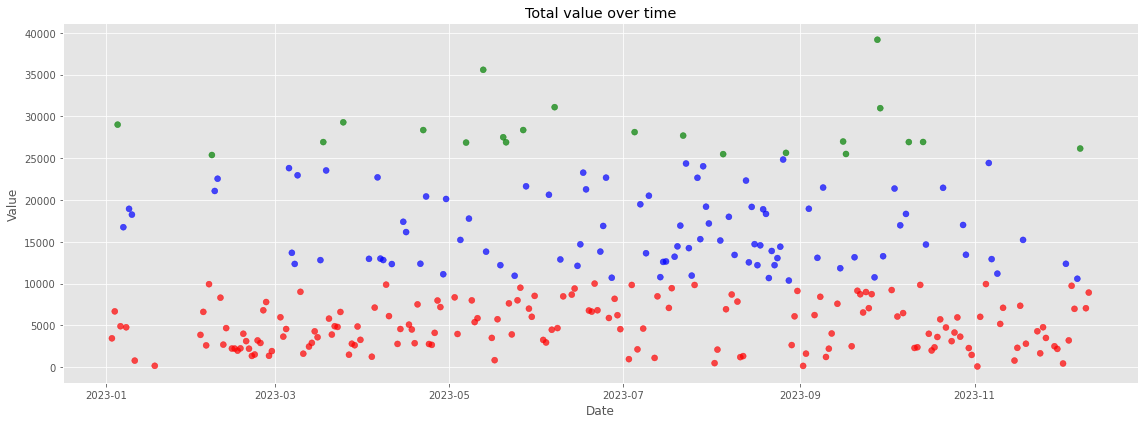

In [46]:
colors = daily_grouped['Value'].apply(lambda x: 'green' if x >= 25000 else 'red' if x < 10000 else 'blue' )


plt.figure(figsize = (16,6))
plt.scatter(daily_grouped['Date'], daily_grouped['Value'], c=colors,alpha =0.7)
plt.title('Total value over time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.style.use('ggplot')
plt.show()

In [28]:
daily_grouped

,Date,Value
0,2023-01-03,3444.0
1,2023-01-04,6671.0
2,2023-01-05,29018.0
3,2023-01-06,4892.0
4,2023-01-07,16743.0
...,...,...
275,2023-12-06,6974.0
276,2023-12-07,10576.0
277,2023-12-08,26160.0
278,2023-12-10,7048.0
